# Dalitz

Let's try to fit some Dalitz data. To start with it's probably simpler to generate a model with `zfit` itself and fit it back.

## Decay

We will fit 

$$
D^0 \to K^0_S \pi^+\pi^-
$$

decays generated with the following intermediate resonances:
- $D^0 \to K^0_S \rho(770)$
- $D^0 \to K^{*-}\pi^+$

### Phasespace
At first, we should be able to generate the correct phase-space. 
In this decay, it is defined by the two invariant mass paramenters 

$$
m^2_{12}= m^2(K^0_S\pi^+)\qquad m^2_{13}= m^2(K^0_S\pi^-)
$$

In [1]:
#Import modules
import zfit
import numpy as np

/Users/maurizio/Software/zfit/lib/python3.10/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
import os, sys
sys.path.append(f'{os.environ["PWD"]}/utilities')
from dalitz import DalitzKinematics

In [3]:
# Define Observables
mKS = 0.495
mPi = 0.13957
mDz = 1.864
decay = DalitzKinematics(mDz, [mPi,mKS,mPi])
mp = zfit.Space("mp", limits=(decay.mSqMin([0,1]), decay.mSqMax([0,1])))
mn = zfit.Space("mn", limits=(decay.mSqMin([1,2]), decay.mSqMax([1,2])))

Plot the phase space

In [4]:
import matplotlib.pyplot as plt

/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:127: RuntimeWarning: invalid value encountered in sqrt
  Ymin= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)+ np.sqrt(Est3*Est3-m3Sq),2)
/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:128: RuntimeWarning: invalid value encountered in sqrt
  Ymax= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)- np.sqrt(Est3*Est3-m3Sq),2)


Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

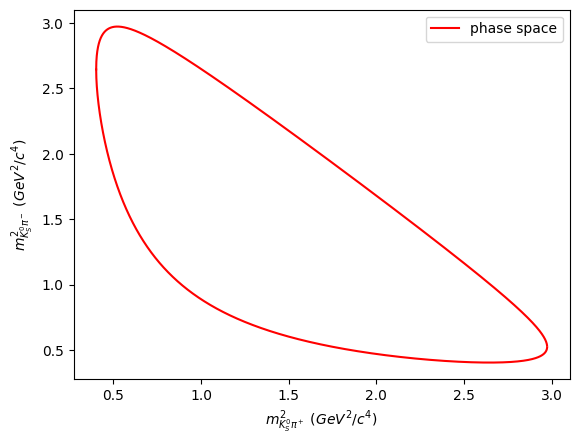

In [5]:
X, Yl, Yh = decay.Contour([0,1],10000)
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

Generate events to fill the phase space

In [6]:
import phasespace
from phasespace import GenParticle

In [7]:
genPip = GenParticle('pi+', mPi)
genPim = GenParticle('pi-', mPi)
genKS  = GenParticle('KS' , mKS)
genDz  = GenParticle('D0' , mDz)
genDz.set_children(genPip,genKS,genPim)
#weights, particles = phasespace.nbody_decay(mDz,[mPi,mKS,mPi]).generate(n_events=1000)
weights, particles = genDz.generate(n_events=1000)

In [8]:
particles

{'pi+': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.05007339, -0.20685897, -0.37795566,  0.45566243],
        [ 0.12859422,  0.30540575, -0.28905723,  0.46134912],
        [-0.06742023,  0.34751083, -0.03775816,  0.38238034],
        ...,
        [-0.22435652,  0.43182634, -0.16264046,  0.53173446],
        [ 0.59356637, -0.07357189,  0.04005186,  0.61548176],
        [-0.0458047 ,  0.16259791,  0.10053813,  0.24108889]])>,
 'KS': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[ 0.01058415,  0.18344879, -0.37086594,  0.64523796],
        [ 0.40011071,  0.13972201,  0.24504522,  0.69619177],
        [-0.50569027, -0.43655127,  0.21592414,  0.85903894],
        ...,
        [ 0.4361474 , -0.59643594,  0.37246708,  0.9642184 ],
        [-0.72313159,  0.2726713 , -0.18646686,  0.93651686],
        [ 0.17495889,  0.10848547,  0.62617219,  0.82431567]])>,
 'pi-': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[ 0.03948924,  0.02341018,  0.7488216 , 

In [9]:
pPiPi = particles['pi+']+particles['pi-']
pKSPip = particles['pi+']+particles['KS']
pKSPim = particles['pi-']+particles['KS']

In [10]:
import tf_kinematics as tfk

In [11]:
tfk.M(pPiPi).numpy()

array([1.14633062, 1.06024435, 0.7190437 , 0.71353952, 0.57370662,
       0.46915555, 1.23343241, 0.54690329, 0.5809909 , 0.98376303,
       0.41101941, 0.91198952, 1.00908751, 0.59284848, 0.5941152 ,
       0.86633456, 1.02808309, 1.01535426, 0.67016809, 0.9152053 ,
       0.52439577, 0.87293513, 1.31385437, 0.62602629, 0.74312424,
       1.28288761, 1.11637662, 0.80653964, 1.29653307, 1.13883249,
       0.53401084, 1.2528719 , 1.04097555, 0.9408904 , 0.43496187,
       0.73295692, 0.46010243, 0.59645982, 0.78704626, 0.34258507,
       0.59372633, 0.35593119, 1.01511364, 0.76632662, 0.77824941,
       0.73058074, 1.07342176, 0.58635927, 1.21345249, 0.9249172 ,
       1.00582833, 0.38315688, 0.67647793, 0.49692595, 0.82461504,
       0.83672124, 0.54698602, 0.97195248, 0.55896754, 1.00687453,
       1.12056311, 1.15164754, 1.11311347, 1.08321275, 1.02618932,
       1.29100602, 0.68716793, 0.75325255, 0.31448056, 0.65523543,
       0.96127056, 0.95528004, 0.84786657, 1.27733727, 1.16133

In [12]:
mSqP = tfk.M2(pKSPip).numpy()
mSqN = tfk.M2(pKSPim).numpy()

Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

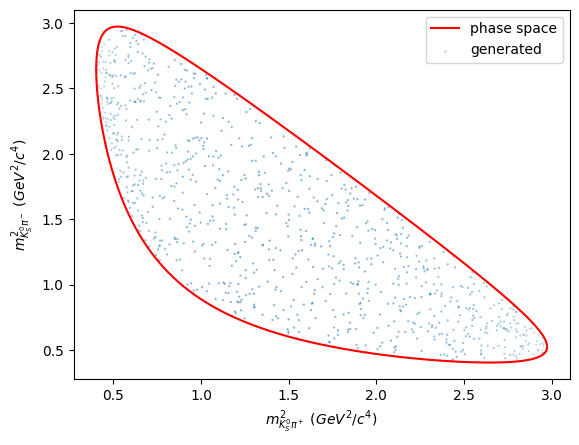

In [13]:
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.scatter(mSqP,mSqN,label='generated', s=weights.numpy(), alpha=0.5)
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

## Generate Data with a Model
Let's first import a relativistic Breit Wigner PDF from [zfit-physics](https://github.com/zfit/zfit-physics/tree/develop)

In [15]:
import zfit_physics as zphys

In [30]:
kstmpi= zphys.pdf.RelativisticBreitWigner(m=0.89167, gamma=0.0514, obs=mn ) # TO BE FIXED, USING Msquared

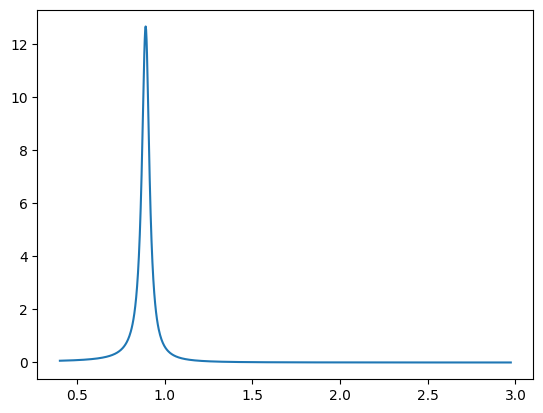

In [26]:
x = np.linspace(mn.limits[0][0][0], mn.limits[1][0][0], 1000)
plt.figure()
y = kstmpi.pdf(x).numpy()
plt.plot(x,y)

In [22]:
mn.limits[1][0][0]

2.9736588249000007